## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

# 先使用迴歸樹:

In [30]:
#載入套件
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [31]:
#讀入資料
import pandas as pd
boston = datasets.load_boston()

In [32]:
#切分訓練集/測試集
x_train,x_test,y_train,y_test = train_test_split(boston.data,
                                                 boston.target,
                                                test_size = 0.3,
                                                random_state = 4)

In [33]:
#建立&擬合(訓練)模型
DTR = DecisionTreeRegressor(criterion = 'mse', #因為這是一個數值問題，用的是迴歸樹
                           max_depth = None,
                           min_samples_split = 2,
                           min_samples_leaf = 1)

DTR.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [34]:
#預測&評估
y_pred1 = DTR.predict(x_test)

# 預測值與實際值的差距，使用 MSE
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred1))


Mean squared error: 34.99


In [35]:
#看看模型使用了那些特徵變數:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

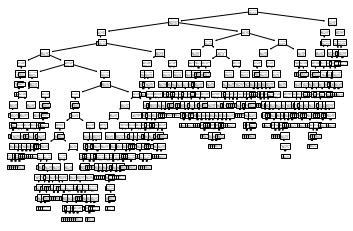

In [66]:
#視覺化:

# 方法一: 使用scikit-learn的 tree.plot_tree 方法
url = 'https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html'
from sklearn import tree
from matplotlib import pyplot as plt

tree.plot_tree(DTR)
plt.show()


In [81]:
# 方法二:使用 Graphviz

#print(boston.feature_names)
#print(boston.target)

from IPython.display import Image 

dot_data = tree.export_graphviz(DTR, out_file=None, 
                         feature_names=boston.feature_names,  
                         #class_names=boston.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [20]:
#特徵重要性:
DTR.feature_importances_

array([5.16908190e-02, 2.52203373e-03, 4.07473195e-03, 8.68322530e-04,
       1.73030258e-02, 5.53629808e-01, 1.35094171e-02, 7.90759487e-02,
       5.17845747e-04, 1.18181044e-02, 3.23697320e-02, 6.91601180e-03,
       2.25704200e-01])

# 然後換分類樹看看:

In [18]:
# 讀取資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data,
                                                    wine.target,
                                                    test_size=0.25,
                                                    random_state=4)


# 建立模型
DTC = DecisionTreeClassifier()

# 訓練模型
DTC.fit(x_train, y_train)

# 預測測試集
y_pred2 = DTC.predict(x_test)

#評估預測結果
acc = metrics.accuracy_score(y_test, y_pred2)
print("Acuuracy: ", acc)

Acuuracy:  0.8888888888888888


In [24]:
#使用的特徵變數:
print("Features this model used:\n ", wine.feature_names)

print("==============================================================")

#特徵重要性:
print("The Feature Importance:\n", DTC.feature_importances_)


Features this model used:
  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
The Feature Importance:
 [0.01364138 0.         0.         0.         0.04405085 0.08158611
 0.04296585 0.         0.         0.38625023 0.         0.04285558
 0.38865   ]


# 調整參數部分，參考解答可以發現，test_size設置得越小，模型預測的表現就越好


